In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


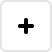
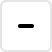
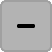
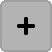
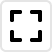
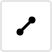
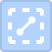
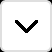
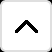
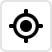
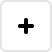
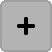
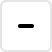
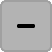
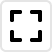
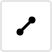
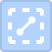
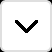
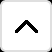
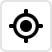

In [2]:
LetsPlot.setup_html()

## 1. [Issue #1288](https://github.com/JetBrains/lets-plot/issues/1288) - Allow absolute width for `geom_errorbar` (and possibly others)

In [3]:
def get_errorbar_data(n, seed=42):
    np.random.seed(seed)
    return pd.DataFrame({
        'x': np.random.choice(list("ABCDEFGHIJKLMNOP"), size=n),
        'y': np.random.normal(size=n),
    })

errorbar_df = get_errorbar_data(100)
errorbar_subdf = errorbar_df[errorbar_df['x'].isin(['A', 'B', 'C', 'D'])].reset_index(drop=True)

In [4]:
def get_errorbar_plot(df, width=None, width_unit=None, *, xlim=None):
    cat_size = len(df['x'].unique())
    return ggplot(df, aes('x', 'y')) + \
        geom_errorbar(stat='summary', width=width, width_unit=width_unit) + \
        coord_cartesian(xlim=xlim) + \
        ggtitle("categories count: {0}\nwidth={1}, width_unit={2}{3}".format(
            cat_size, width, width_unit,
            "" if xlim is None else "\nxlim={0}".format(xlim)
        ))

In [5]:
gggrid([
    get_errorbar_plot(errorbar_df),
    get_errorbar_plot(errorbar_subdf),
    get_errorbar_plot(errorbar_df, width=.75, width_unit='res'),
    get_errorbar_plot(errorbar_subdf, width=.75, width_unit='res'),
    get_errorbar_plot(errorbar_df, width=10, width_unit='px'),
    get_errorbar_plot(errorbar_subdf, width=10, width_unit='px'),
    get_errorbar_plot(errorbar_df, width=10, width_unit='px', xlim=[-.5, 15.5]),
    get_errorbar_plot(errorbar_subdf, width=10, width_unit='px', xlim=[-.5, 3.5]),
], ncol=2)

## 2. Custom `width` with `'identity'` stat

Suppose we have the following hand-calculated statistics for `binwidth=[4, 4]`:

In [6]:
tile_stat_data = {
    'x': [2,  2, 6, 10, 10],
    'y': [2, 10, 2,  2, 10],
    'mean': [1.2, 1.8, 0.8, 1.2, 0.6],
}

And we want to plot this data using `geom_tile()` (or `geom_bin2d(stat='identity')`):

In [7]:
def get_tile_plot(width=None, height=None, width_unit=None, height_unit=None, *, xlim=None, ylim=None):
    return ggplot(tile_stat_data, aes('x', 'y')) + \
        geom_tile(aes(fill='mean'), width=width, height=height,
                  width_unit=width_unit, height_unit=height_unit) + \
        coord_fixed(xlim=xlim, ylim=ylim) + \
        ggtitle("Supposed binwidth: [4, 4]\nwidth={w}, width_unit={wu}\nheight={h}, height_unit={hu}{xlim}{ylim}".format(
            w=width, wu=width_unit,
            h=height, hu=height_unit,
            xlim="" if xlim is None else "\nxlim={0}".format(xlim),
            ylim="" if ylim is None else "\nylim={0}".format(ylim),
        ))

In [8]:
gggrid([
    get_tile_plot(),
    get_tile_plot(width=1, height=.5, width_unit='res', height_unit='res'),
    get_tile_plot(width=4, height=4, width_unit='scale', height_unit='scale'),
    get_tile_plot(width=4, height=4, width_unit='scale', height_unit='scale', xlim=[-.5, 12.5], ylim=[-.5, 12.5]),
], ncol=2)